<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/JM_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [6]:
import warnings

warnings.filterwarnings('ignore')

input

In [7]:
df = pd.read_csv("JM_current.csv")

exploratory

In [8]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        270 non-null    int64
 1   Problem Solving  270 non-null    int64
 2   Interaction      270 non-null    int64
 3   Impact           270 non-null    int64
 4   Accountability   270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [9]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,68,20,27,45,0
1,54,27,20,55,0
2,89,27,27,30,0
3,89,27,27,30,0
4,54,20,27,64,0


checks

In [10]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,89.281481,30.092593,34.088889,75.733333,14.788889
std,23.832486,9.534263,10.396215,27.325574,17.245329
min,52.000000,20.000000,20.000000,30.000000,0.000000
25%,68.000000,27.000000,27.000000,55.000000,0.000000
50%,89.000000,27.000000,27.000000,64.000000,0.000000
75%,111.250000,36.000000,36.000000,90.000000,30.000000
max,150.000000,65.000000,70.000000,142.000000,53.000000


In [11]:
X=df

Scaling

In [12]:
cols = X.columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [14]:
X = pd.DataFrame(X, columns=[cols])

In [15]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.163265,0.000000,0.14,0.133929,0.0
1,0.020408,0.155556,0.00,0.223214,0.0
2,0.377551,0.155556,0.14,0.000000,0.0
3,0.377551,0.155556,0.14,0.000000,0.0
4,0.020408,0.000000,0.14,0.303571,0.0


In [16]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.163265,0.000000,0.14,0.133929,0.000000
1,0.020408,0.155556,0.00,0.223214,0.000000
2,0.377551,0.155556,0.14,0.000000,0.000000
3,0.377551,0.155556,0.14,0.000000,0.000000
4,0.020408,0.000000,0.14,0.303571,0.000000
...,...,...,...,...,...
265,0.673469,1.000000,0.58,1.000000,0.396226
266,0.979592,0.355556,0.64,0.875000,0.924528
267,0.979592,1.000000,0.32,0.767857,0.528302
268,0.979592,1.000000,0.32,0.767857,0.396226


K means

In [17]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [18]:
kmeans.cluster_centers_

array([[0.71386054, 0.48240741, 0.48944444, 0.75272817, 0.60455975],
       [0.25917337, 0.13041526, 0.20626263, 0.28309885, 0.16066324]])

inertia

In [19]:
kmeans.inertia_

40.36544106108719

Elbow

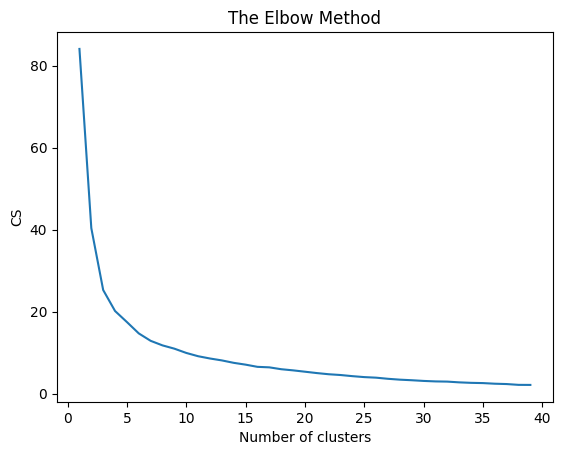

In [20]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

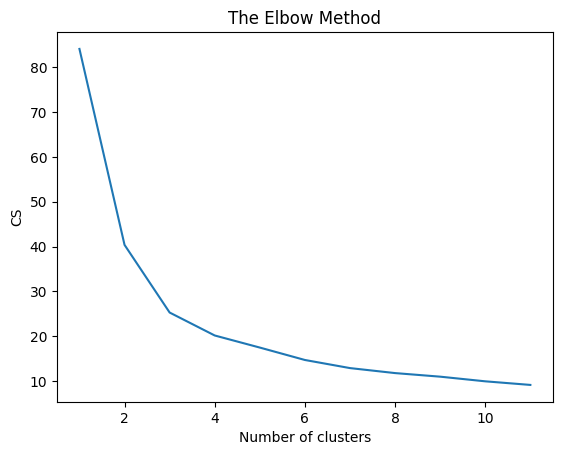

In [21]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [32]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_current_l')
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2
 0 0 0 0 0 0 1 1 1 0 0 0 0 2 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 2 2 1 0 0 1 1 1 0 0 0 2 1 0 0 0 0 0 2 0 0 2 2 1 0 0 0 0 1 2 2
 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
Z=kmeans.cluster_centers_
Z

array([[ 7.09253564e-01,  4.80669711e-01,  4.87123288e-01,
         7.49755382e-01,  6.01705867e-01],
       [ 1.68178382e-01,  1.72839506e-02,  1.38148148e-01,
         2.83234127e-01,  5.81761006e-01],
       [ 2.92707293e-01,  1.71561772e-01,  2.31188811e-01,
         2.81281219e-01, -2.22044605e-16]])

In [34]:

#tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
#tsne_scale_results = tsne.fit_transform(X)
#tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
#plt.figure(figsize = (10,10))
#plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
#plt.xlabel('tsne1')
#plt.ylabel('tsne2')
#plt.show()

In [35]:
import matplotlib

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 270 samples in 0.000s...
[t-SNE] Computed neighbors for 270 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 0.256350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.162453
[t-SNE] KL divergence after 2500 iterations: -0.954210


In [37]:
np.unique(labels)


array([0, 1, 2], dtype=int32)

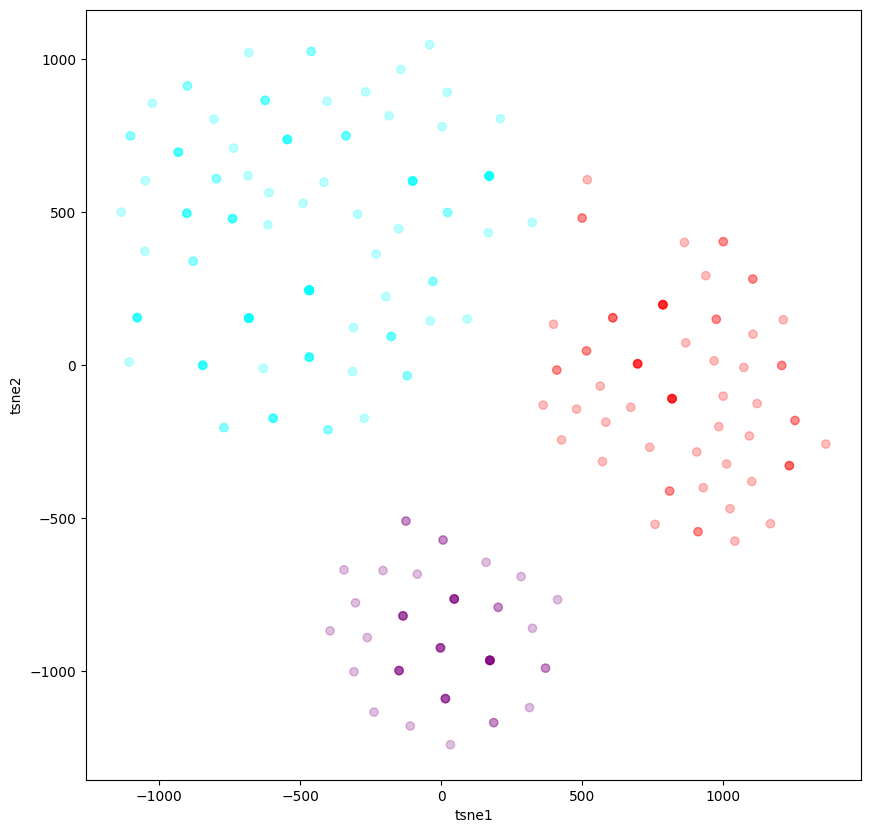

In [38]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [39]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_current')
Z2

array([[ 1.21506849e+02,  4.16301370e+01,  4.43561644e+01,
         1.13972603e+02,  3.18904110e+01],
       [ 6.84814815e+01,  2.07777778e+01,  2.69074074e+01,
         6.17222222e+01,  3.08333333e+01],
       [ 8.06853147e+01,  2.77202797e+01,  3.15594406e+01,
         6.15034965e+01, -1.17683641e-14]])